In [150]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../Class")
sys.path.append("../utils")

import numpy as np
import matplotlib.pyplot as plt
from loss import  LogSoftMaxCrossEntropy
from lineaire import Linear
from transformations import TanH, SoftMax, ReLU 
from encapsulage import Sequential, Optim
from conv1D import Conv1D, MaxPool1D, Flatten
from conv2D import Conv2D, AvgPool2D, Flatten2D
from sklearn.datasets import fetch_openml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")


uspsdatatrain = "../data/USPS_train.txt"
uspsdatatest = "../data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)


# 1D

## Reseau 1

In [156]:
alltrainx_1d = alltrainx.reshape(alltrainx.shape[0], alltrainx.shape[1], 1)
alltestx_1d = alltestx.reshape(alltestx.shape[0], alltestx.shape[1], 1)

### batch size

100%|██████████| 100/100 [11:25<00:00,  6.85s/it]


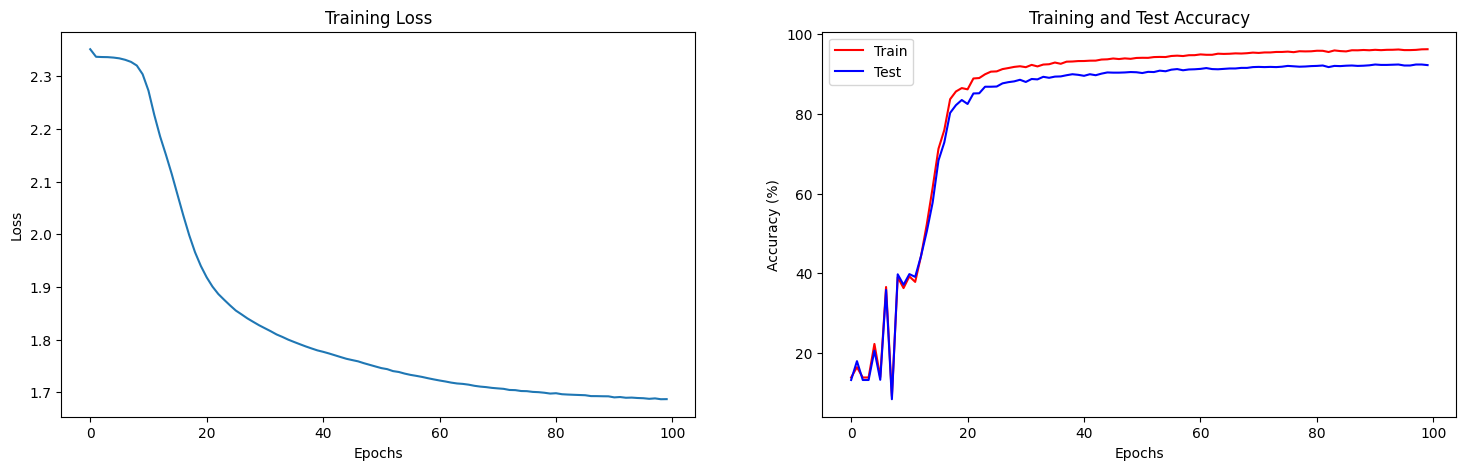

In [4]:
# Conv1D(3,1,32) → MaxPool1D(2,2) → Flatten()→ Linear(4064,100) → ReLU() → Linear(100,10)
# batch_size=128
network = Sequential(
    Conv1D(3,1,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(4064,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=128,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [6]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9626937319983542
accuracy test   0.9227703039362232


In [115]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9644767521601975
accuracy test   0.9232685600398605


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [09:29<00:00,  5.69s/it]


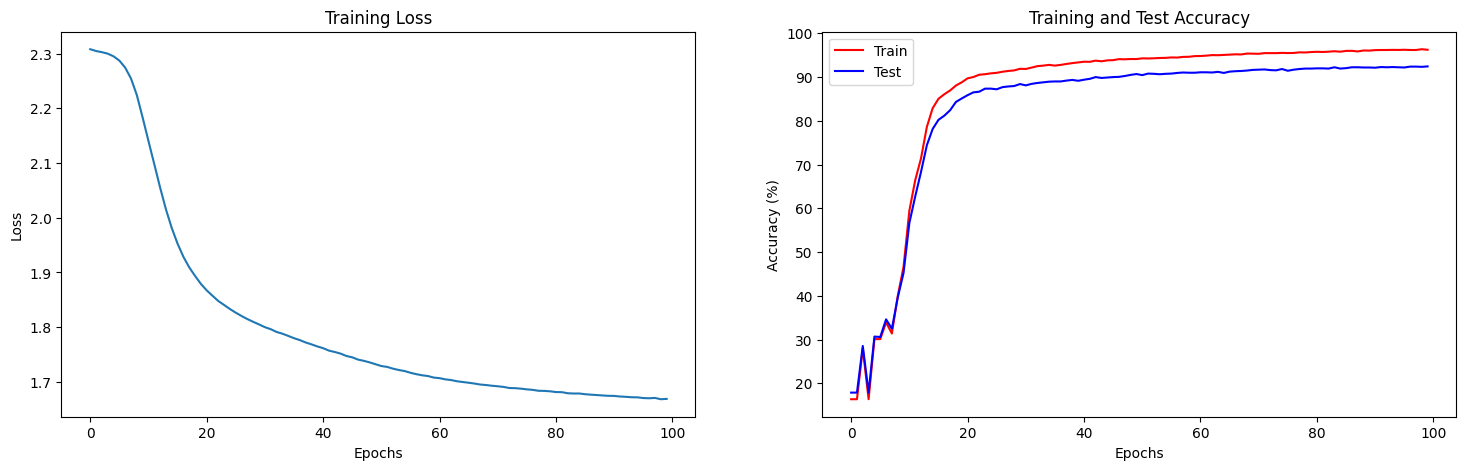

In [74]:
#batch_size=32
network = Sequential(
    Conv1D(3,1,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(4064,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [75]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9622822658071595
accuracy test   0.924265072247135


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [08:29<00:00,  5.09s/it]


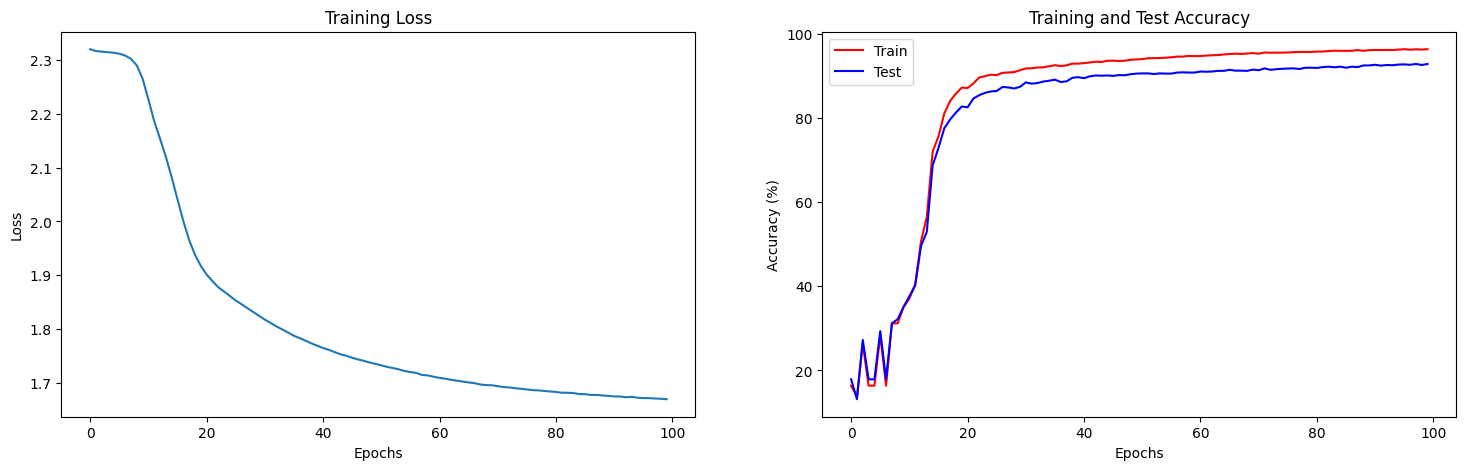

In [139]:
#batch_size=64
network_mieux = Sequential(
    Conv1D(3,1,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(4064,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network_mieux, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [140]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9637909751748731
accuracy test   0.9287493771798705


100%|██████████| 100/100 [08:28<00:00,  5.09s/it]


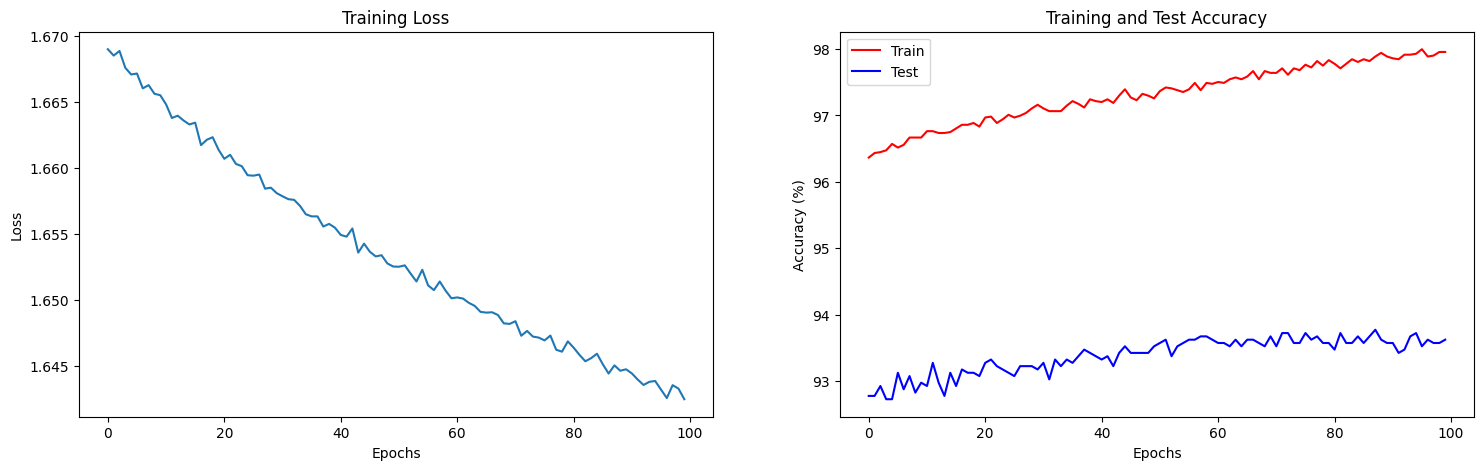

In [141]:
optimizer = Optim(network_mieux, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [142]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9795638458373337
accuracy test   0.9362232187344295


100%|██████████| 100/100 [08:21<00:00,  5.01s/it]


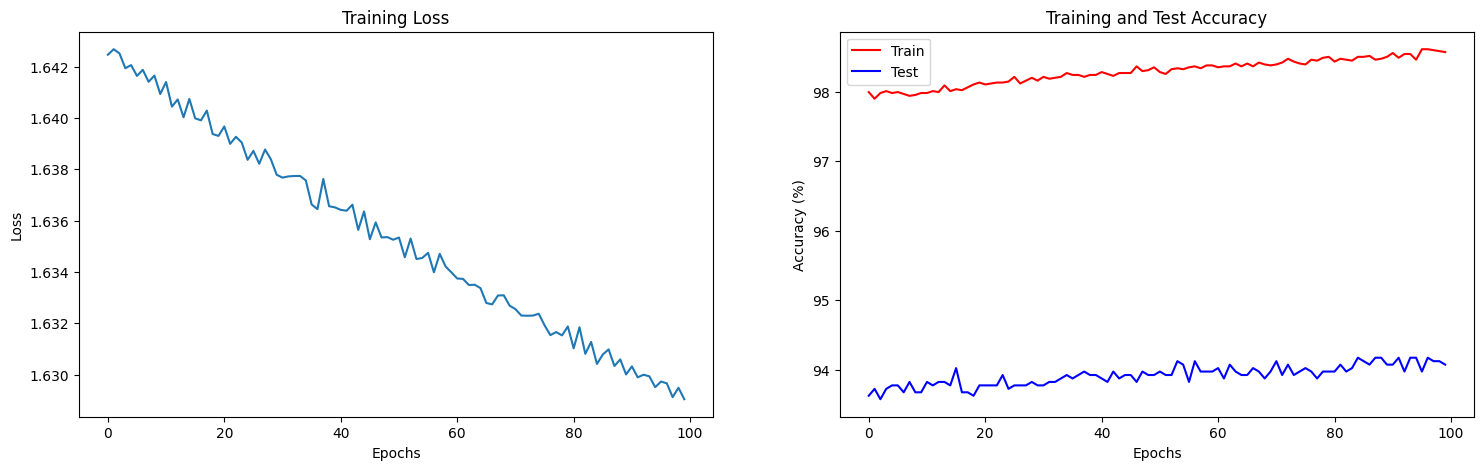

In [143]:
optimizer = Optim(network_mieux, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [144]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.985735838705253
accuracy test   0.9407075236671649


100%|██████████| 100/100 [08:39<00:00,  5.19s/it]


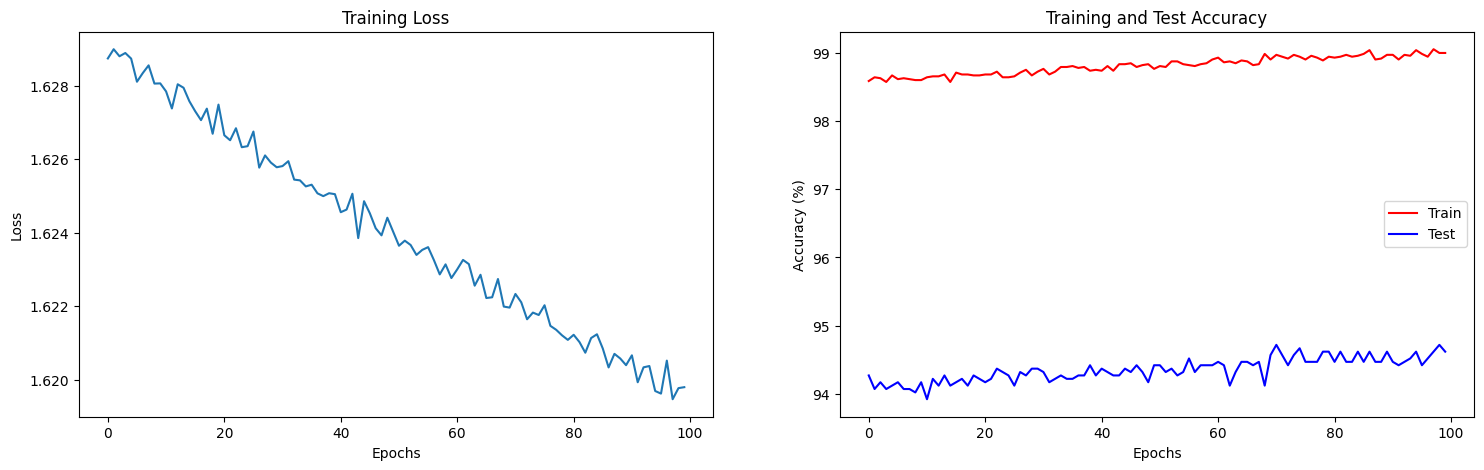

In [145]:
optimizer = Optim(network_mieux, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [146]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9899876560142642
accuracy test   0.9461883408071748


100%|██████████| 100/100 [08:47<00:00,  5.28s/it]


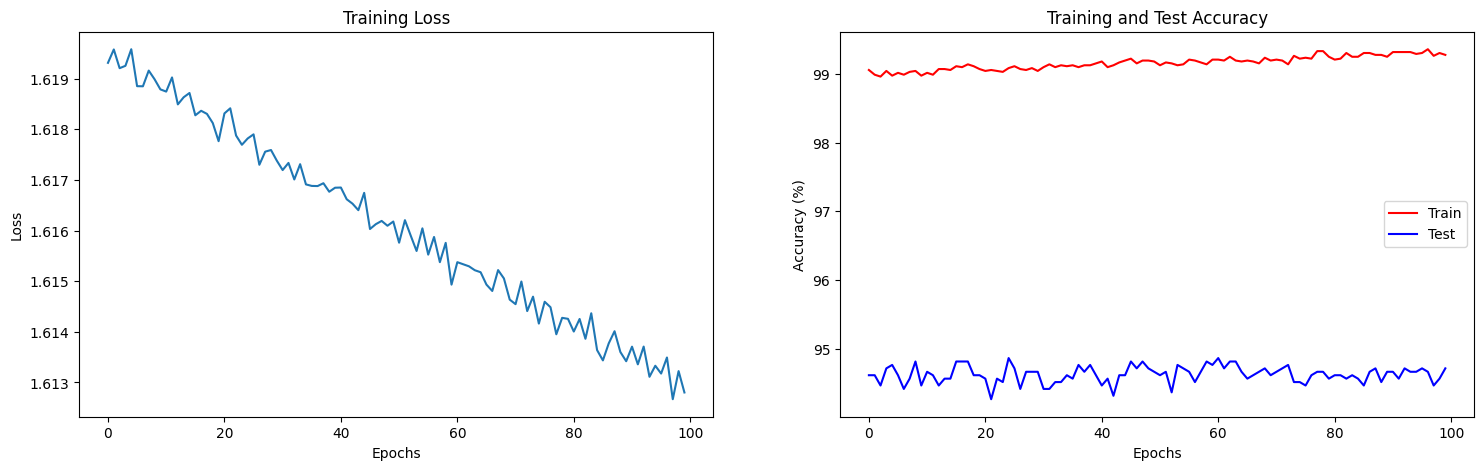

In [147]:
optimizer = Optim(network_mieux, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [148]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9927307639555617
accuracy test   0.9471848530144494


100%|██████████| 100/100 [09:24<00:00,  5.65s/it]


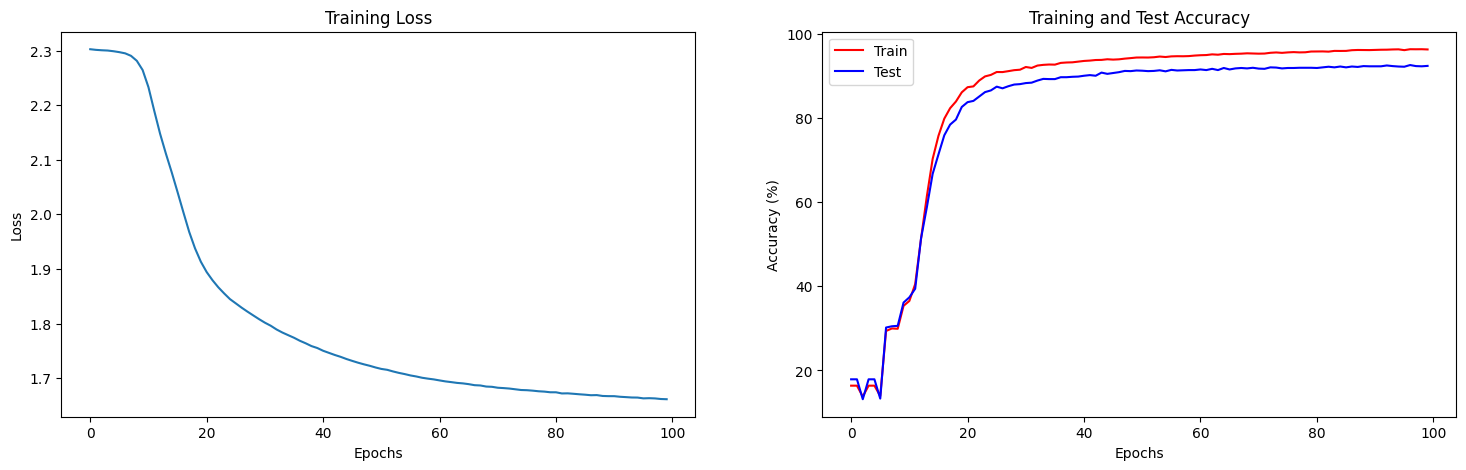

In [78]:
# batch_size=16
network = Sequential(
    Conv1D(3,1,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(4064,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=16,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [79]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.962830887395419
accuracy test   0.9237668161434978


### chan_out

100%|██████████| 100/100 [15:20<00:00,  9.20s/it]


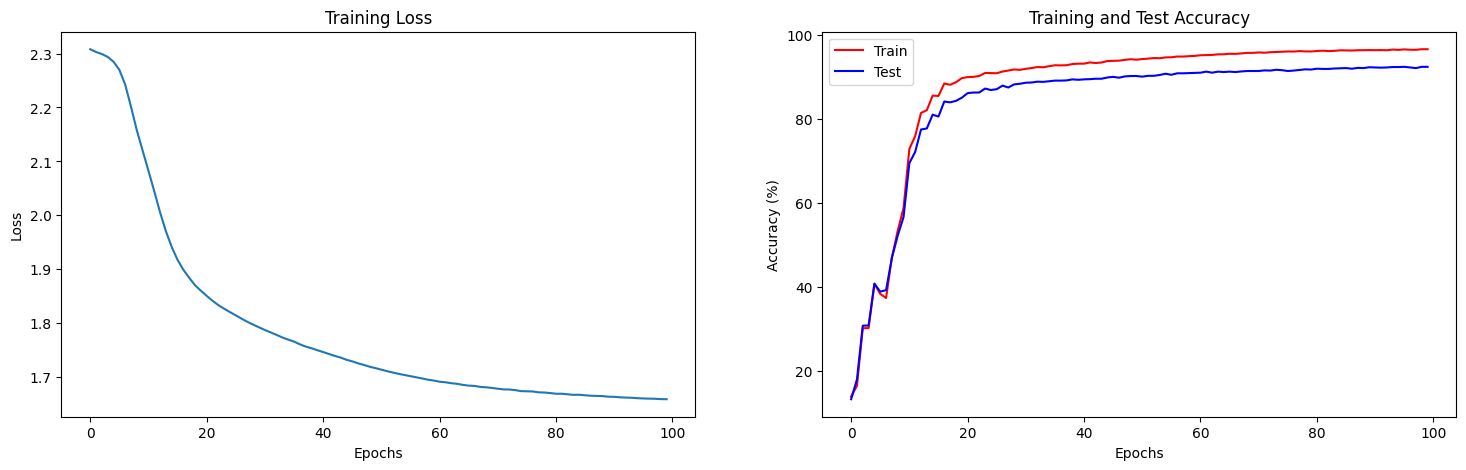

In [80]:
#chan_out 64
network2 = Sequential(
    Conv1D(3,1,64,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(8128,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network2, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [81]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9662597723220409
accuracy test   0.924265072247135


100%|██████████| 100/100 [30:27<00:00, 18.28s/it]


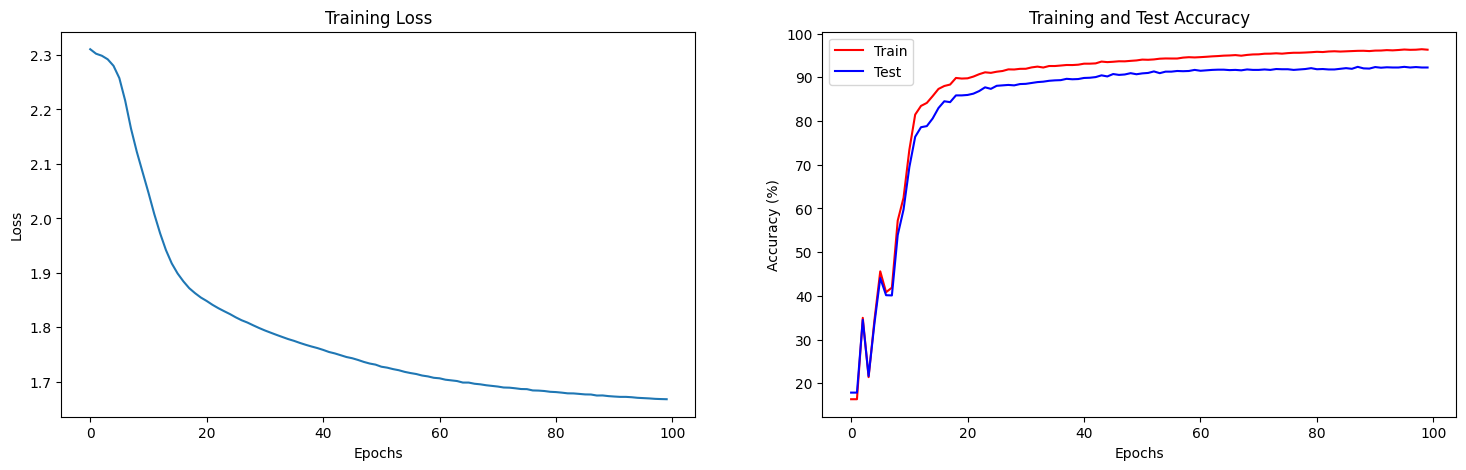

In [82]:
#chan_out 128
network2 = Sequential(
    Conv1D(3,1,128,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(16256,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network2, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [83]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9629680427924839
accuracy test   0.922272047832586


100%|██████████| 100/100 [05:09<00:00,  3.10s/it]


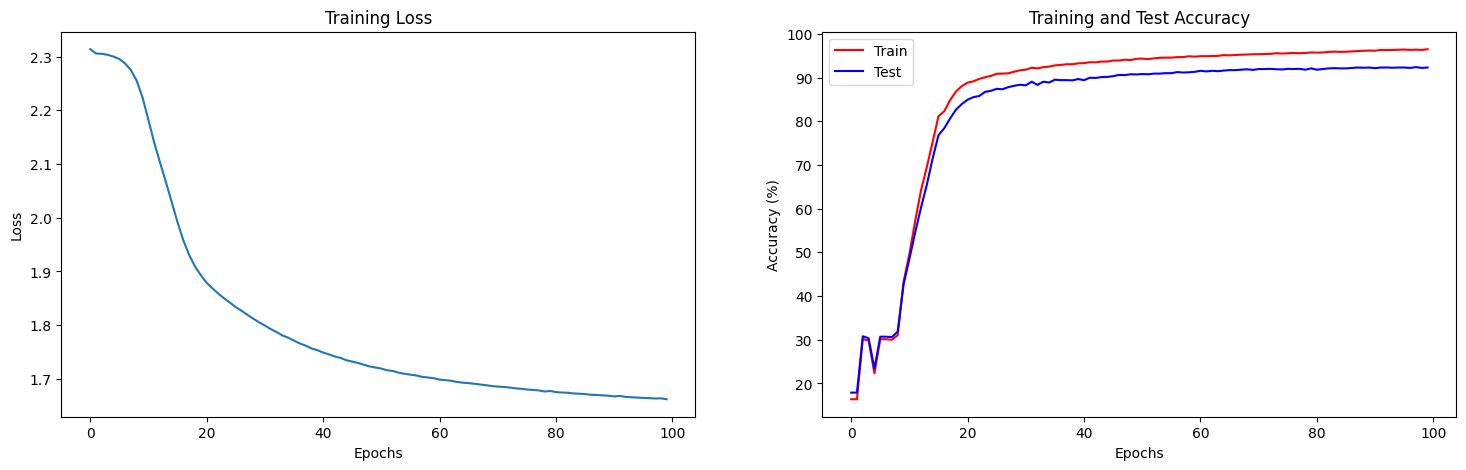

In [84]:
# chan_out 16
network2 = Sequential(
    Conv1D(3,1,16,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(2032,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network2, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [85]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9651625291455219
accuracy test   0.9232685600398605


## Réseau 2

100%|██████████| 100/100 [2:18:56<00:00, 83.36s/it] 


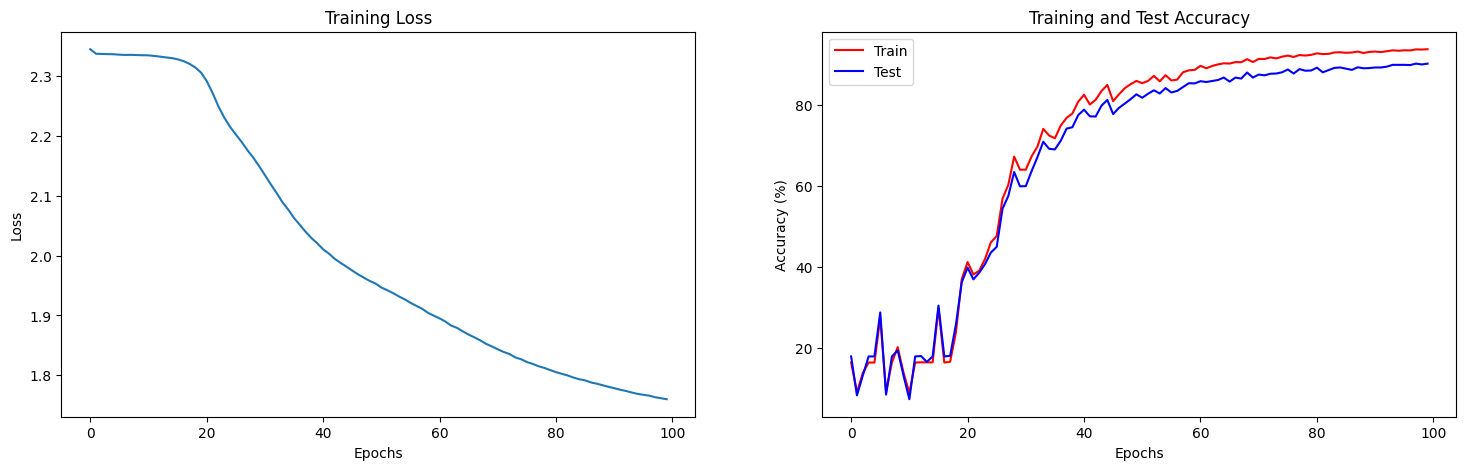

In [29]:
network = Sequential(
    Conv1D(3,1,128,1),
    MaxPool1D(2,2),
    Conv1D(3,128,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(1984,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=128,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

In [30]:
print("accuracy train : ", optimizer.score(alltrainx_1d, alltrainy))
print("accuracy test  ", optimizer.score(alltestx_1d, alltesty))

accuracy train :  0.9374571389384172
accuracy test   0.9018435475834579


## Réseau 3

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [4:01:22<00:00, 144.83s/it] 


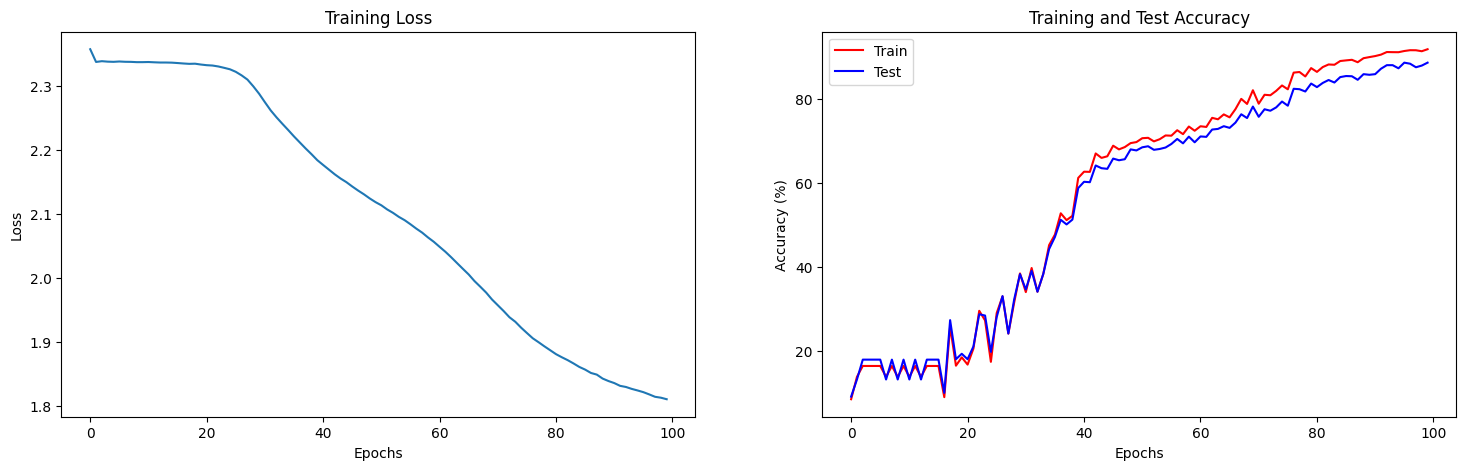

In [138]:
network = Sequential(
    Conv1D(3,1,128,1),
    MaxPool1D(2,2),
    Conv1D(3,128,64,1),
    MaxPool1D(2,2),
    Conv1D(3,64,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(960,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx_1d,
    y_train=alltrainy,
    batch_size=128,
    epochs=100,
    x_test=alltestx_1d,
    y_test=alltesty,
    plot=True,
)

# 2D

In [93]:
# expend data usps en 2D (batch, height, width, channel)
alltrainx_2d = alltrainx.reshape(-1,16,16,1)
alltestx_2d = alltestx.reshape(-1,16,16,1)


## Réseau 1

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [07:59<00:00,  4.80s/it]


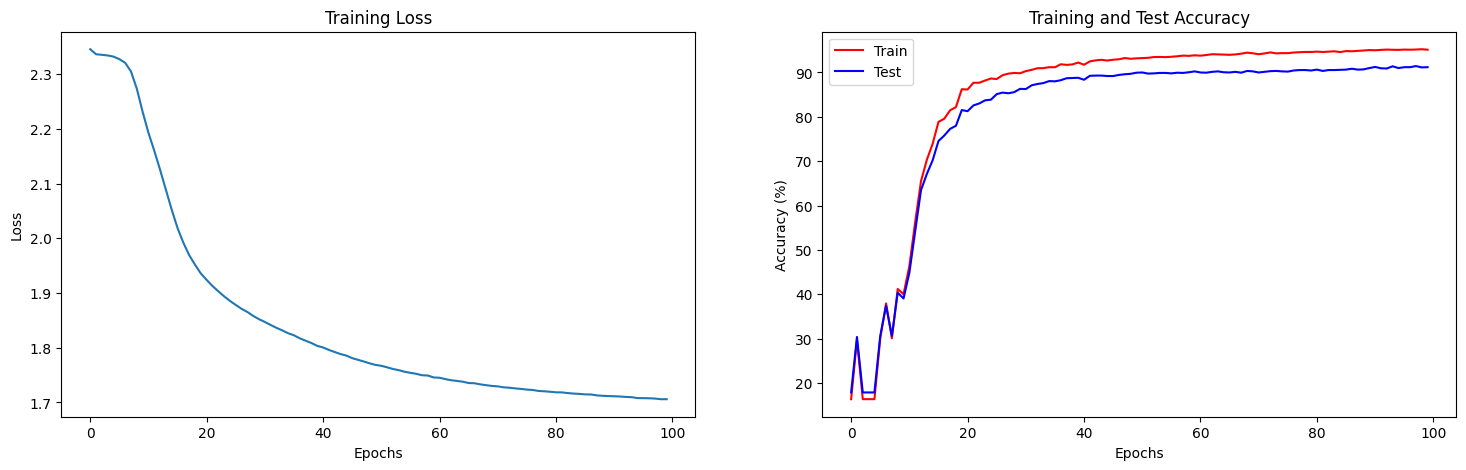

In [70]:
network_2d = Sequential(
    Conv2D(3,3,1,32,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(1568,100),
    ReLU(),
    Linear(100,10),
)

optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=128,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [53]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9525442326155534
accuracy test   0.9162929745889388


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [07:49<00:00,  4.70s/it]


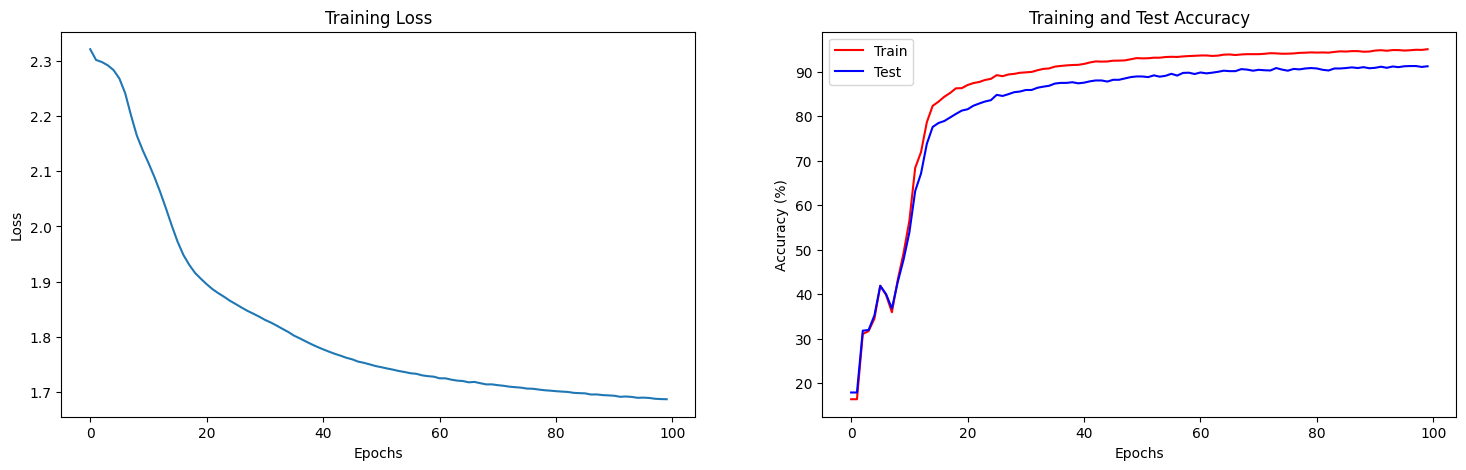

In [97]:
#batch size 32
network_2d = Sequential(
    Conv2D(3,3,1,32,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(1568,100),
    ReLU(),
    Linear(100,10),
)
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [98]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9506240570566452
accuracy test   0.9123069257598405


100%|██████████| 100/100 [07:47<00:00,  4.67s/it]


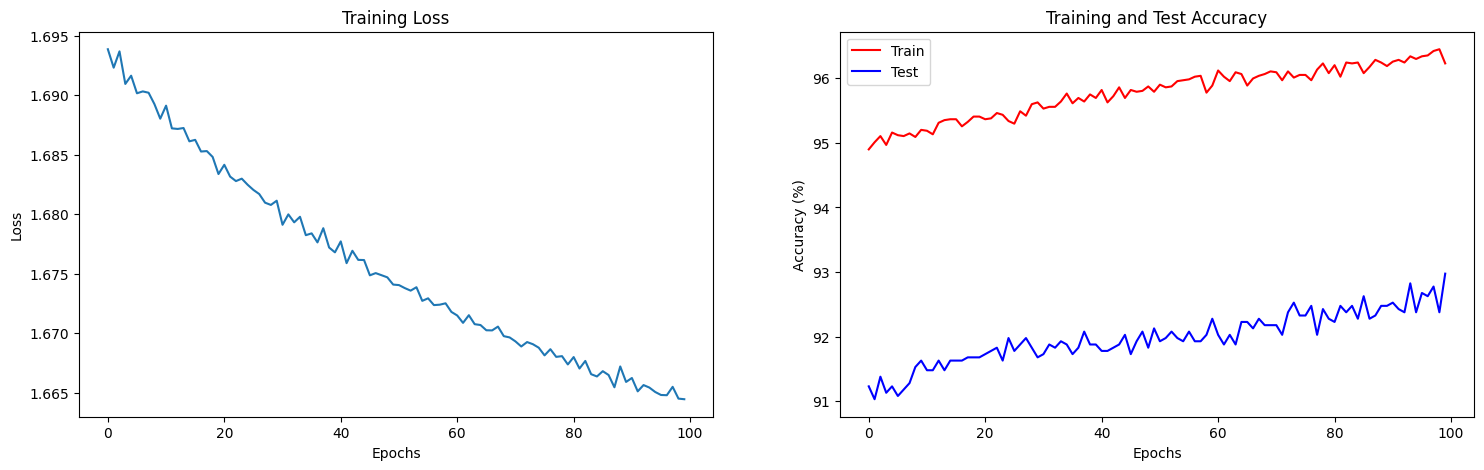

In [99]:
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [100]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9622822658071595
accuracy test   0.929745889387145


## Réseau 2

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [11:32<00:00,  6.92s/it]


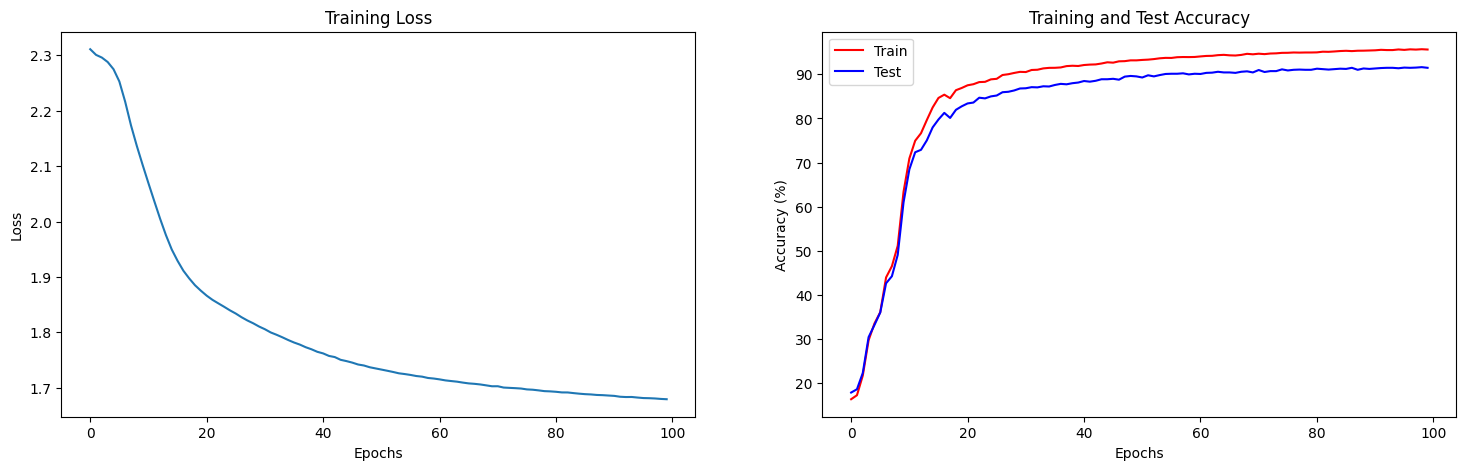

In [126]:
# chan_out 64
network_2d = Sequential(
    Conv2D(3,3,1,64,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(3136,100),
    ReLU(),
    Linear(100,10),
)
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [127]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.956247428336305
accuracy test   0.9147982062780269


100%|██████████| 100/100 [11:17<00:00,  6.77s/it]


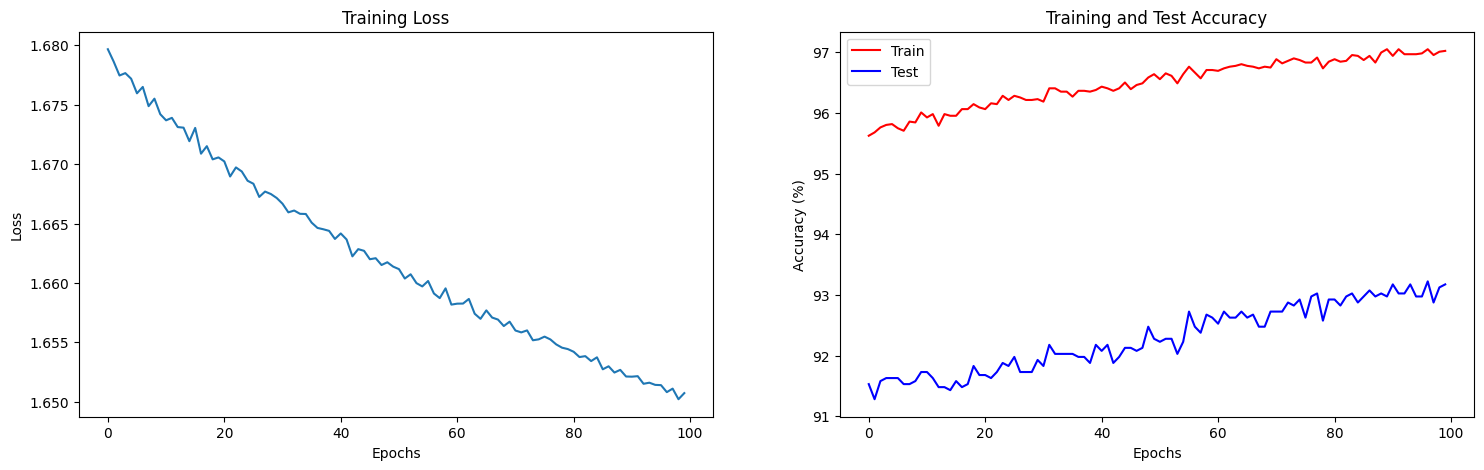

In [128]:
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [129]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9702372788369222
accuracy test   0.931738913801694


100%|██████████| 100/100 [11:32<00:00,  6.92s/it]


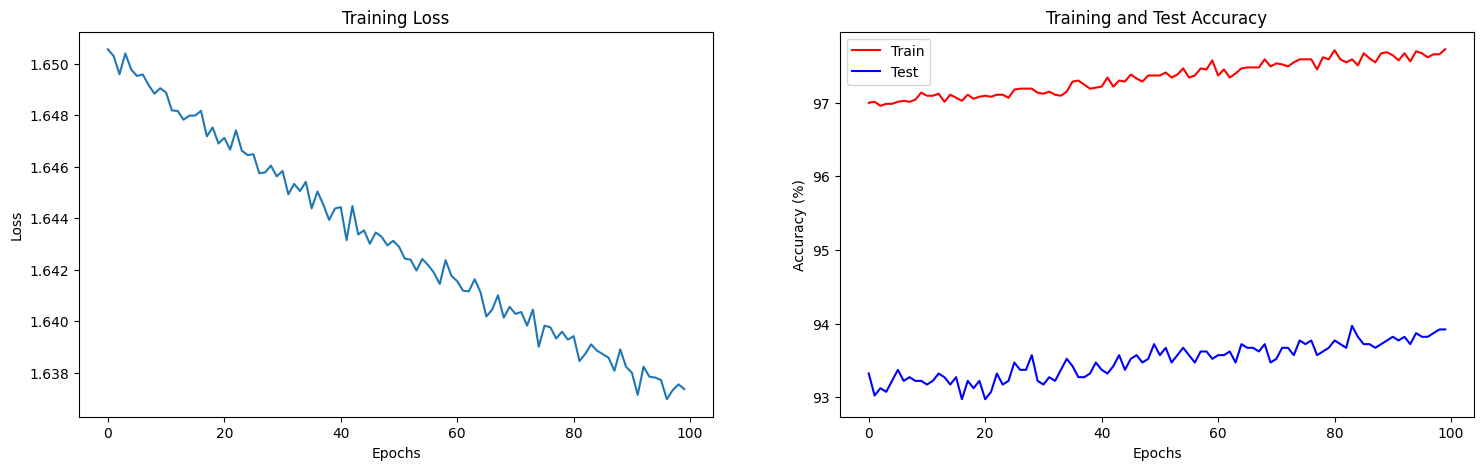

In [130]:
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [131]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9772322040872309
accuracy test   0.9392127553562531


100%|██████████| 100/100 [12:29<00:00,  7.49s/it]


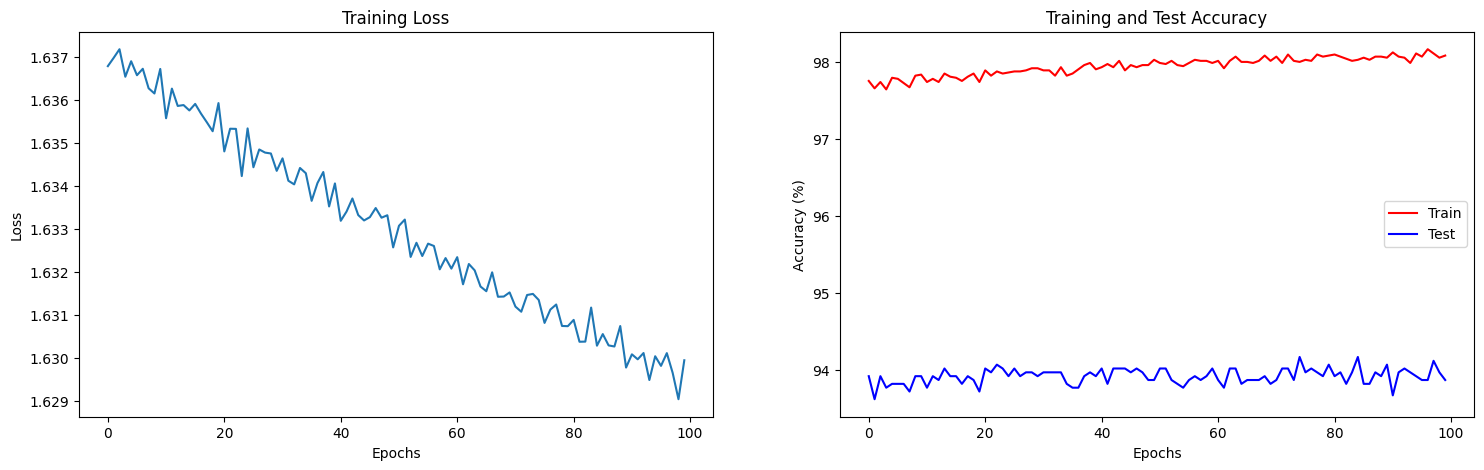

In [133]:
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [134]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9807982444109176
accuracy test   0.9387144992526159


100%|██████████| 100/100 [13:23<00:00,  8.03s/it]


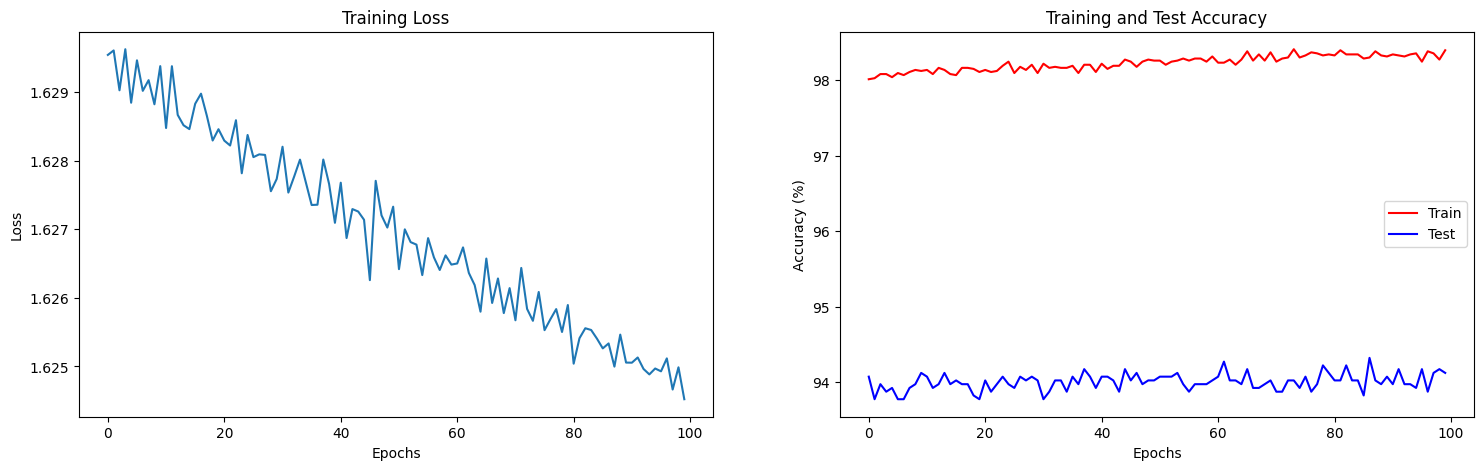

In [135]:
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [136]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9839528185434097
accuracy test   0.9412057797708022


100%|██████████| 100/100 [06:23<00:00,  3.84s/it]


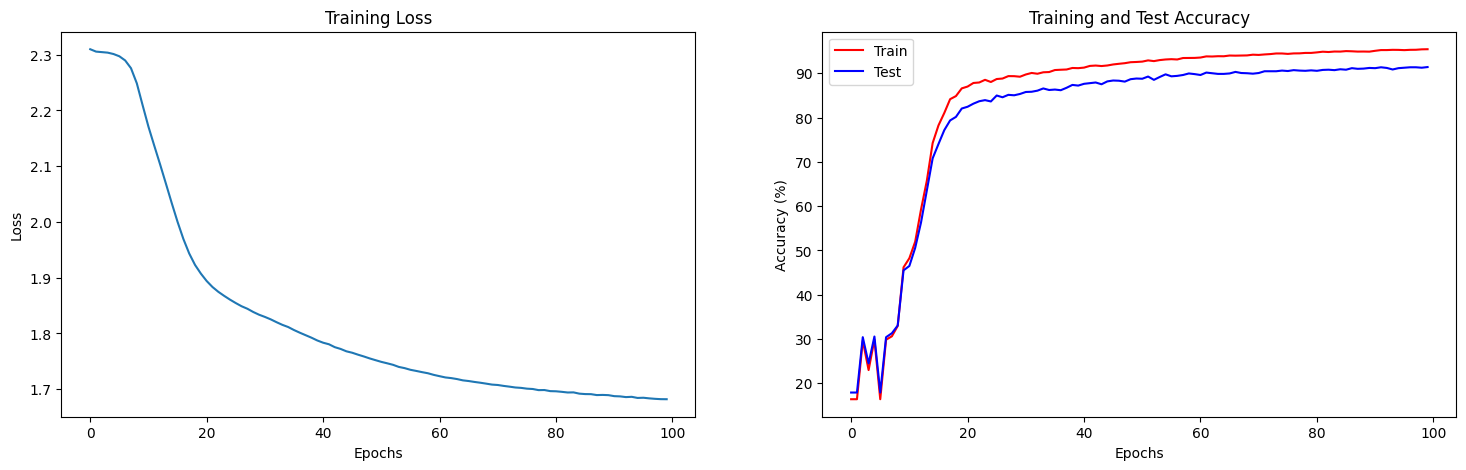

In [109]:
# chan_out 16
network_2d = Sequential(
    Conv2D(3,3,1,16,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(784,100),
    ReLU(),
    Linear(100,10),
)
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [110]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9546015635715266
accuracy test   0.9142999501743896


## Réseau 3

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [19:13<00:00, 11.54s/it]


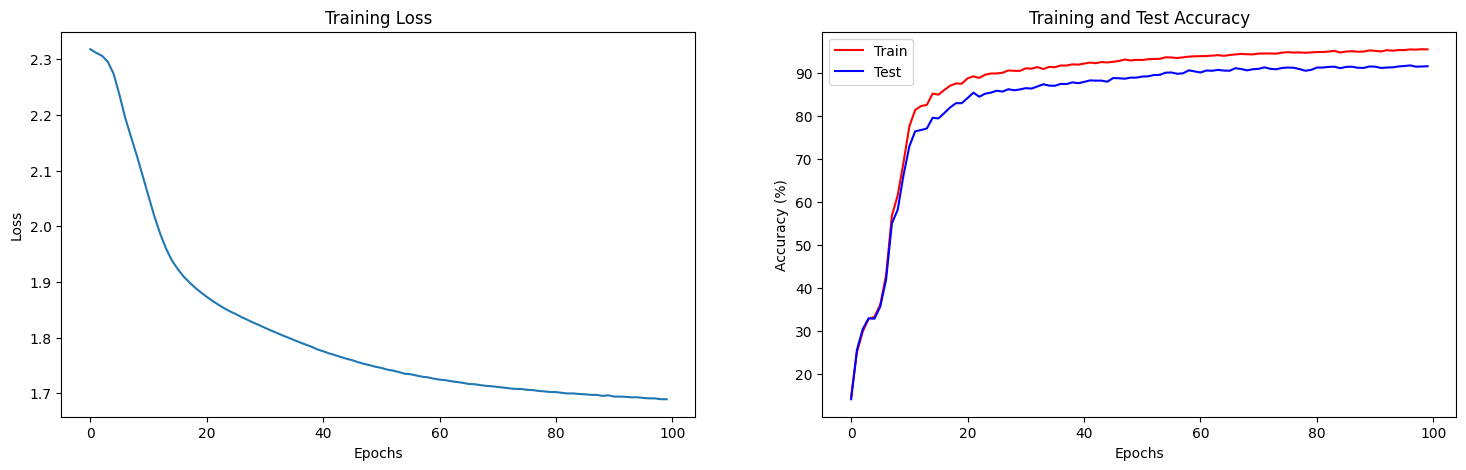

In [112]:
network_2d_2 = Sequential(
    Conv2D(3,3,1,32,1,1),
    AvgPool2D(2,2,1,1),
    Conv2D(3,3,32,64,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(1600,100),
    ReLU(),
    Linear(100,10),
)

optimizer_2d_2 = Optim(network_2d_2, LogSoftMaxCrossEntropy(),  1e-2)
optimizer_2d_2.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=128,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [113]:
print("accuracy train : ", optimizer_2d_2.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d_2.score(alltestx_2d, alltesty))

accuracy train :  0.9539157865862021
accuracy test   0.9147982062780269
